# Linear Algebra and Linear Systems

In [2]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from scipy import linalg
np.set_printoptions(suppress=True)

A lot of problems in statistical computing can be described mathematically using linear algebra. This notebook is meant to serve as a review of concepts in linear algebra, so that we may discuss some important matrix decompositions used in statistical analyses.

## Linear Systems

A linear system of equations is a collection of linear equations
$$
\begin{align}
a_{0,0}x_0 + a_{0,1}x_2 + \cdots + a_{0,n}x_n & = b_0 \\
a_{1,0}x_0 + a_{1,1}x_2 + \cdots + a_{1,n}x_n & = b_1 \\
& \vdots \\
a_{m,0}x_0 + a_{m,1}x_2 + \cdots + a_{m,n}x_n & = b_m \\
\end{align}
$$

In matrix notation, a linear system is $A \mathbf{x}= \mathbf{b}$ where:

$$
A = \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\
\vdots & & & \vdots \\
a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\
\end{bmatrix}
 \ \ , \ \
\mathbf{x} = \begin{bmatrix}
x_0 \\ x_1 \\ \vdots \\ x_n
\end{bmatrix}
 \ \ , \ \
\mathbf{b} = \begin{bmatrix}
b_0 \\ b_1 \\ \vdots \\ b_m
\end{bmatrix}
$$

This reduces the problem to a matrix equation, and now solving the system amounts to finding $A^{-1}$ (or sort of). Certain properties of the matrix $A$ yield important information about the linear system.

## Multiplication of $A \mathbf{x}$ Using Columns of $A$

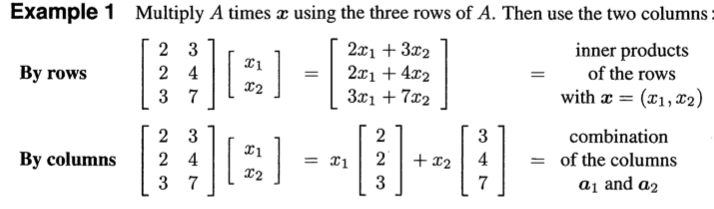

* Both ways give the same result. 
* The first way is used for computing but not for understanding: It is a low level.
* The vector approach sees $A \mathbf{x}$ as a linear combination of $a_1$ and $a_2$.

<div class="alert alert-block alert-warning">
$A \mathbf{x}$ is a linear combination of the columns of $A$. This is fundamental!
</div>

In [3]:
A = np.arange(12).reshape((3,4))mb
B = np.arange(12).reshape((4,3))

In [4]:
A @ B

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

In [5]:
A.T @ A

array([[ 80,  92, 104, 116],
       [ 92, 107, 122, 137],
       [104, 122, 140, 158],
       [116, 137, 158, 179]])

In [6]:
A @ A.T

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

In [9]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
# column multiplication
x = np.array([1, 1, 0, 1])
A @ x.T

array([ 4, 16, 28])

In [10]:
# row multiplication
x = np.array([1, 0, 1])
x @ A

array([ 8, 10, 12, 14])

## Linear Independence, Rank and Basis

When no vector in the set may be expressed as a linear combination of the others. In this sense, linear independence is an expression of non-redundancy in a set of vectors.

<div class="alert alert-block alert-info">
<b>Fact:</b> Any linearly independent set of $n$ vectors spans an $n$-dimensional space. (I.e. the collection of all possible linear combinations is $\mathbb{R}^n$.) Such a set of vectors is said to be a basis of $\mathbb{R}^n$. Another term for basis is minimal spanning set.</div>

Example:

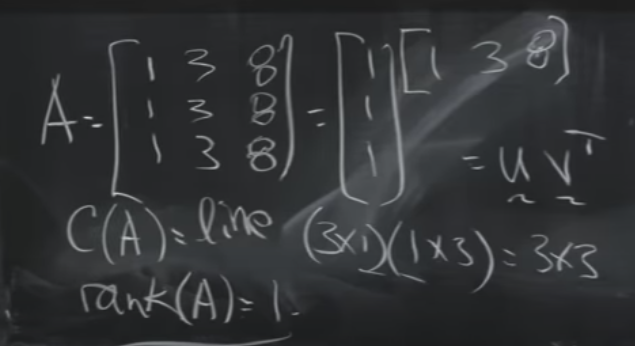

* Since the columns of A are all linear dependent, so is rank(A) = 1 and,
* column space of A C(A) = line

To compute the rank of a matrix we use the numpy's `linalg.matrix_rank()` method. The function uses the SVD method to estimate the rank. 

<div class="alert alert-block alert-warning">
<b>Definition:</b> The rank of a matrix is the dimension of its column space.
</div>

The example below demonstrates how to get the rank of the above matrix:

In [12]:
A = np.array([
    [1, 3, 8],
    [1, 3, 8],
    [1, 3, 8]
])
np.linalg.matrix_rank(A)

1

In [13]:
# another example:

B = np.array([
    [2, 1, 3],
    [3, 1, 4],
    [5, 7, 12]
])
np.linalg.matrix_rank(B)

2

That's right since the third column vector of B is the sum of the two first columns.  
Thus, the column space of B is C(B) = plane or $\mathbb{R}^2$.

<div class="alert alert-block alert-warning">
<b>Definition:</b> The combinations of the columns fill out the column space of A.
</div>

=> $b = (b_1, b_2, b_3)$ is in the column space of $A$ exactly when $A \mathbf{x} = b$ has a solution $(x_1,x_2)$


<div class="alert alert-block alert-warning">
<b>Definition:</b> A basis for a subspace is a full set of independent vectors : All vectors in the space are combinations of the basis vectors.
</div>

Examples will make the point:

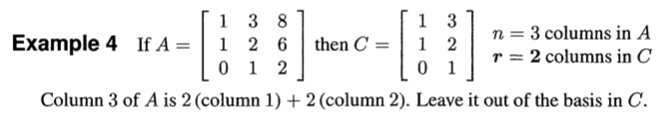

* The number r is the "rank" of $A$. It is also the rank of $C$
* It counts independent columns.
* C is the **basis** for the column space of $A$

The matrix C connects to A by a third matrix R: A = CR. Their shapes are
(m by n) = (m by r) (r by n). I can show this "factorization of A" in Example 4 above:

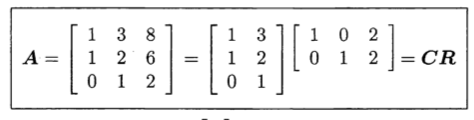

* Actually R is a famous matrix in linear algebra:

<div class="alert alert-block alert-info">
R = rref(A) = row-reduced echelon form of A (without zero rows).</div>

We could compute $CR$ using the `sympy` library:

In [38]:
import sympy as sy

A = np.array([
    [1, 3, 8],
    [1, 2, 6],
    [0, 1, 2]
])
R, C = sy.Matrix(A).rref()
# convert R back to numpy array
r = np.array(sy.lambdify((),R)())
r

array([[1, 0, 2],
       [0, 1, 2],
       [0, 0, 0]])

In [46]:
# Basis C:
A[:, C]


array([[1, 3],
       [1, 2],
       [0, 1]])

## Matrices as Linear Transformations

You can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it. When we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we apply the matrix to the vector, it means that we calculate the dot product of the matrix with the vector. 

In [32]:
# First, let's create a function `plotVectors()` 
# to easily plot vectors and visualize transformations

def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.
    
    Parameters
    ----------
    vecs: array-like
        Coordinates of the vectors to plot.
    cols: array-like
        Colors of the vectors
    alpha: float
        Opacity of vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

def primat(v):
    """
    Better print matrix
    """
    print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in v]))

In [24]:
# matrix
A = np.array([[-1, 3],
             [2, -2]
             ])
# vector
v = np.array([[2],
             [1]
             ])
Av = A @ v
print(Av)

[[1]
 [2]]


(-1.0, 4.0)

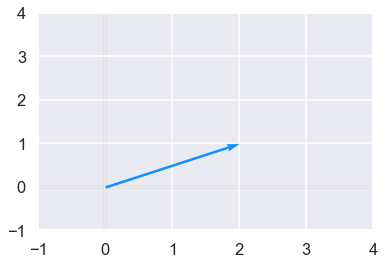

In [25]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

(-1.0, 4.0)

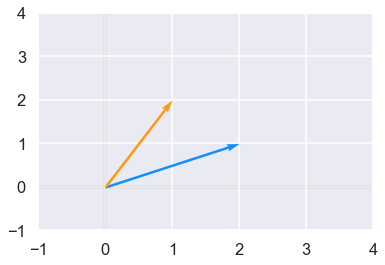

In [28]:
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

* You can think of matrices as linear transformations.

## Solving $Ax = \mathbf{b}$

### For m = n
Using the solve function:

In [47]:
A = np.random.random((3,3))
b = np.random.random((3,1))
A

array([[0.0187, 0.5289, 0.7243],
       [0.8977, 0.1146, 0.9618],
       [0.2402, 0.6475, 0.2585]])

In [49]:
x = np.linalg.solve(A, b)
x

array([[ 0.4166],
       [ 1.0091],
       [-0.213 ]])

### Underdetermined System ($m\lt n$)

When $m \lt n$, the linear system is said to be underdetermined. I.e. there are fewer equations than unknowns. In this case, there are either no solutions (if the system is inconsistent) or infinite solutions. A unique solution is not possible.

### Overdetermined System ($m\gt n$)
When $m\gt n$, the system may be overdetermined. In other words, there are more equations than unknowns. They system could be inconsistent, or some of the equations could be redundant.